In [1]:
from pandas import *
from numpy import *
import matplotlib.pyplot as plt
from seaborn import *

In [2]:
heart = read_csv ('C:\\Users\\DELL\\Desktop\\heart.csv')
heart.head ()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df = DataFrame (heart)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<AxesSubplot:xlabel='age', ylabel='target'>

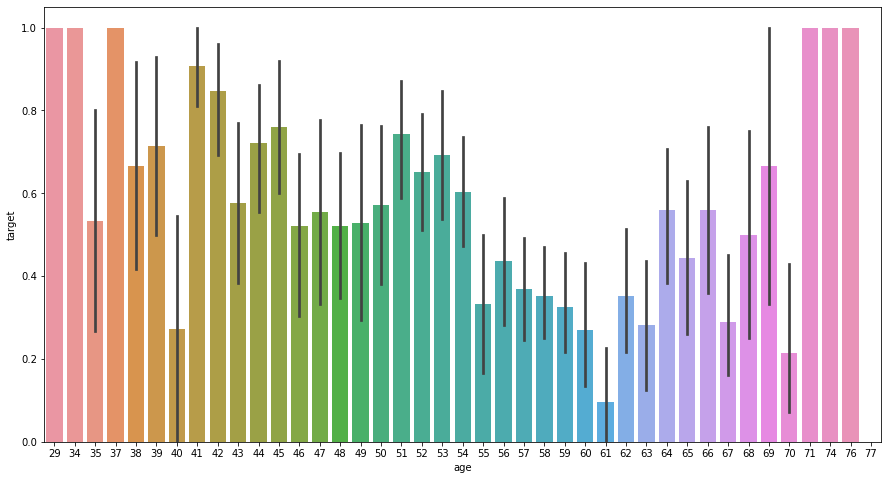

In [16]:
plt.figure (figsize = (15, 8))
barplot (x = 'age', y = 'target', data=heart)

<AxesSubplot:xlabel='sex', ylabel='target'>

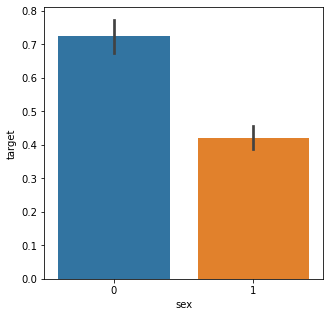

In [21]:
plt.figure (figsize = (5, 5))
barplot (x = 'sex', y = 'target', data = heart)

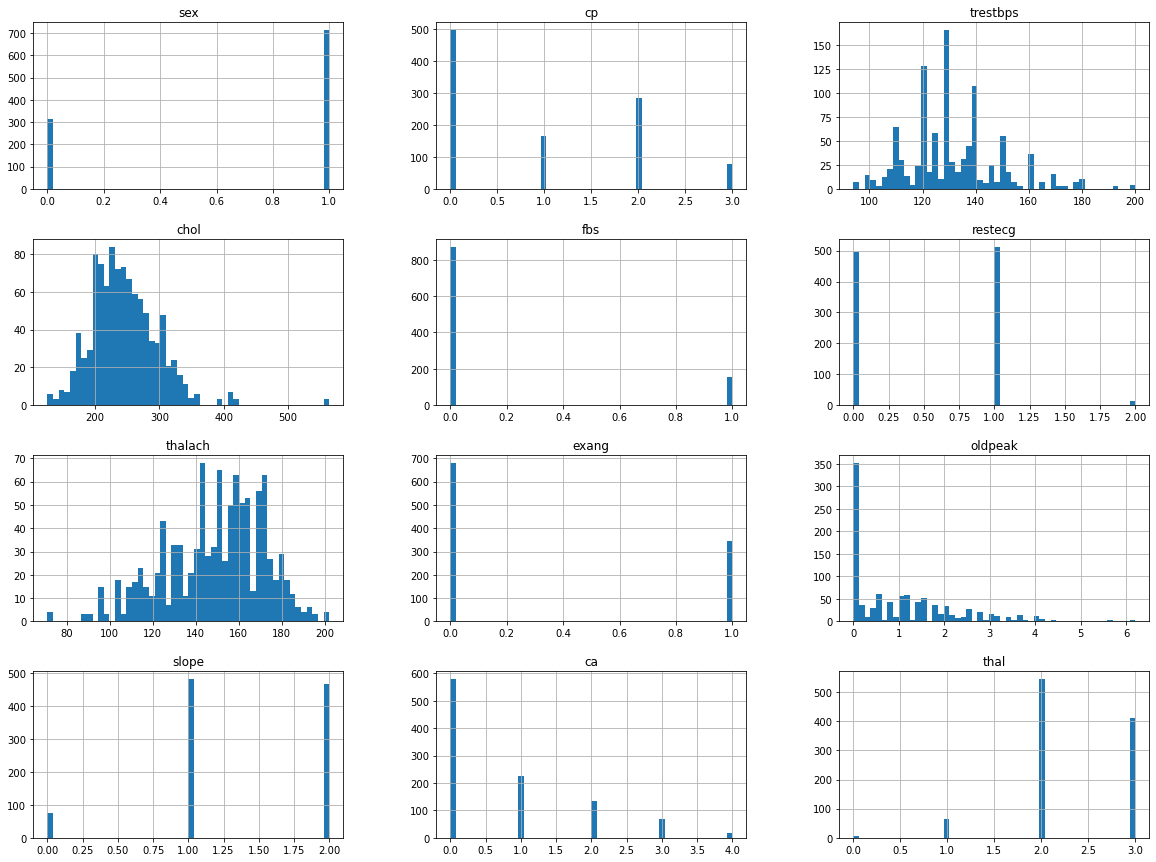

In [26]:
data = heart.iloc [:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
data.hist (bins = 50, figsize = (20, 15))
plt.show ()

<AxesSubplot:>

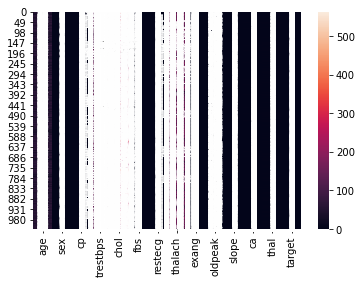

In [28]:
heatmap (heart, annot=True)

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
y = heart ['target'].values

In [33]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [36]:
data_learn=heart.iloc [:, [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].values

In [37]:
trainx, testx, trainy, testy = train_test_split (data_learn, y, test_size=0.2)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [39]:
sc=StandardScaler ()
xtrain = sc.fit_transform (trainx)
xtest = sc.transform (testx)

In [40]:
model = LogisticRegression ()

In [41]:
model.fit (xtrain, trainy)

LogisticRegression()

In [42]:
pred = model.predict (testx)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
print (accuracy_score(testy, pred) * 100)

65.85365853658537


In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
def plotgraph (testy, pred, regressorName):
    if max (testy) >= max (pred):
        myrange = int (max (testy))
    else:
        myrange = int (max (pred))
    plt.scatter(testy,pred,color="red")
    plt.plot(range(myrange),range(myrange),'o')
    plt.title(regressorName)
    plt.show()
    return

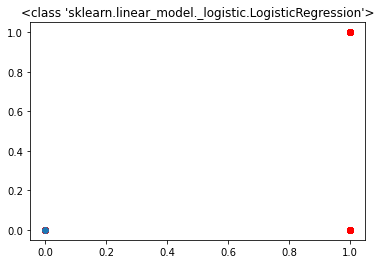

None


In [49]:
print(plotgraph(testy,pred,LogisticRegression))

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
model1=GaussianNB()
model1.fit(xtrain,trainy)
pred1=model.predict(xtest)

In [52]:
print(accuracy_score(testy,pred1)*100)

100.0


In [53]:
from sklearn.svm import SVC

In [54]:
model3=SVC()
model3.fit(xtrain,trainy)
pred2=model.predict(xtest)

In [55]:
print(accuracy_score(testy,pred2)*100)

100.0


In [56]:
input=[[53,1,0,140,203,1,0,155,1,3.1,0,0,3]]
if model.predict(input)==[0]:
    print("Patient is Normal.")
elif model.predict(input)==[1]:
    print("Patient has Heart disease")

Patient is Normal.
